In [1]:
import cv2
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
import sklearn.utils.multiclass as multiclass

import seaborn as sn

import pandas as pd

%matplotlib inline

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 10

labels = np.array(["background", "hard exudate", "haemorrhage", "soft exudate", "micro-aneurysm"])

In [2]:
def vectorise(image):
    return np.array(image.flatten(), dtype=np.uint8)

In [3]:
def classify(vec):
    
    label_vec = np.take(labels, vec)
    
    return label_vec

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    # classes = classes[multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            

    return ax

In [12]:
import pickle as pkl

def evaluate(result_set):
    st = 16
    y_true = classify(vectorise(result_set["truth"][st:st+225,st:st+225]))
    y_pred = classify(vectorise(result_set["pred"]))


    
    plot_confusion_matrix(y_true, y_pred, labels, title="Classification", normalize=True)
#     plt.show()
    # return metrics.confusion_matrix(truth, pred, labels)


Normalized confusion matrix


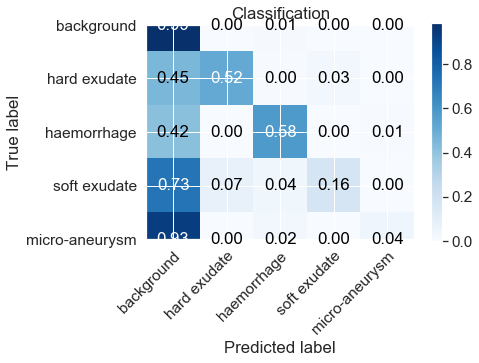

In [13]:
with open("outputs/task1/test5_750epochs.sav", "rb") as saved:
    result_dict = pkl.load(saved)
    evaluate(result_dict)
    
plt.show()